In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("height-weight.csv")

In [6]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height (cm)')

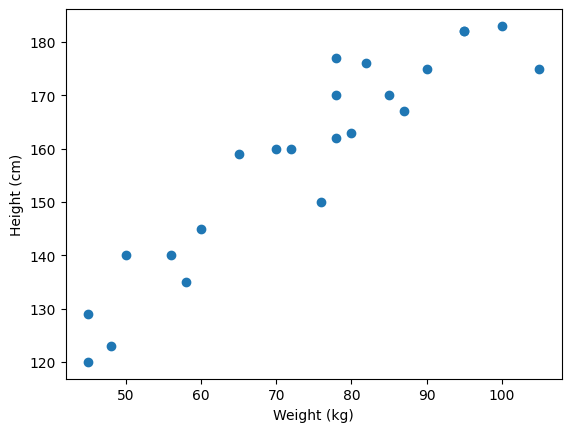

In [8]:
# Scatter plot of height vs weight
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')

In [9]:
## Correlation coefficient
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


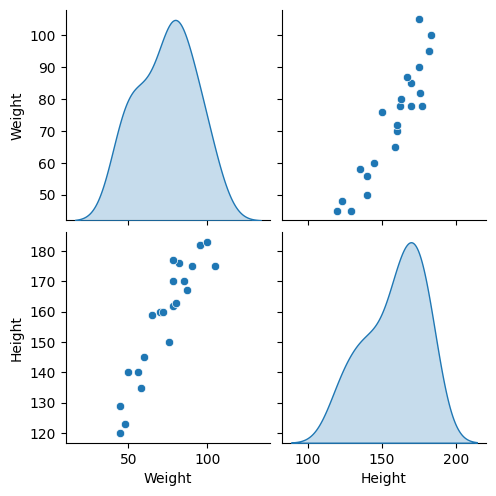

In [10]:
import seaborn as sns
# Pairplot to visualize relationships
sns.pairplot(df, kind='scatter', diag_kind='kde', markers='o')

In [ ]:
## Independent and dependent variables
X = df[["Weight"]] ##independent variable should be a 2D array or DataFrame
y = df["Height"] ## Depenedent variable can be a Series

In [12]:
X_series = df["Weight"]  # This is a Series, not a DataFrame
y_series = df["Height"]  # This is a Series, not a DataFrame

In [13]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
## Standardization - This is done to ensure that the features have a mean of 0 and a standard deviation of 1, i.e unit should be same
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data

In [17]:
X_test = scaler.transform(X_test)  # Only transform the test data, because we want to apply the same scaling as the training data, else it will lead to data leakage which is not good for model performance as it will not generalize well to unseen data.

In [18]:
## Applying Linear Regression
from sklearn.linear_model import LinearRegression

In [19]:
regression = LinearRegression()
regression.fit(X_series, y_train)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [20]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
regression.coef_ #basically slope of the line, one unit change in X will lead to this much change in Y, i.e 1 unit change in weight will lead to 17.29 cm change in height

array([17.2982057])

In [22]:
regression.intercept_

np.float64(156.47058823529412)

Text(0, 0.5, 'Height (cm)')

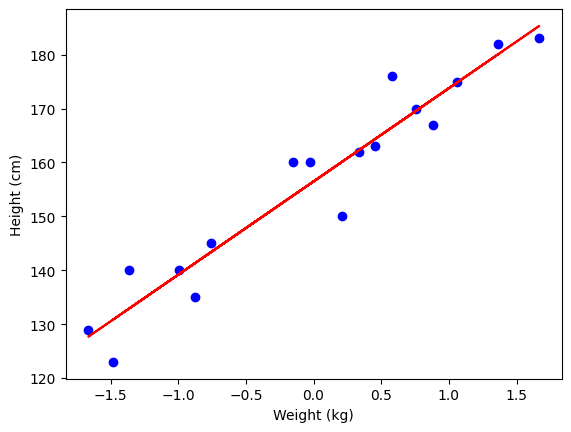

In [23]:
## plot best fit line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, regression.predict(X_train), color='red', label='Best Fit Line')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')

In [25]:
## predicting on test data
y_pred = regression.predict(X_test)

In [26]:
## Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [28]:
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 114.84069295228699
Mean Absolute Error: 9.66512588679501


In [29]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 10.716374991212605


In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

In [31]:
r2

0.7360826717981276

In [34]:
## OLS linear regression
import statsmodels.api as sm

In [35]:
model = sm.OLS(y_train, X_train).fit()  # Add constant for intercept

In [37]:
predictions = model.predict(X_test)
print(predictions)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [38]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 08 Jun 2025   Prob (F-statistic):                       0.664
Time:                        20:50:25   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\abhij\anaconda3\envs\almlenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [41]:
## predicting on new data
regression.predict([[70]])  # Predicting height for a weight of 70 kg

array([1367.34498754])

In [42]:
## predicting on new data
regression.predict(scaler.transform([[70]]))  # Predicting height for a weight of 70 kg

c:\Users\abhij\anaconda3\envs\almlenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([153.88159699])